In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Load the data
df = pd.read_csv('Employee.csv')

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [6]:
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4648,True
4649,False
4650,False
4651,False


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4645,False
4647,False
4649,False
4650,False


In [10]:
data = df.copy()

In [11]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [12]:
# Split features and target
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), y_train.head()

(      Education  JoiningYear  City  PaymentTier  Age  Gender  EverBenched  \
 4629          0         2017     0            2   35       1            0   
 3412          0         2014     0            3   33       1            0   
 1082          0         2012     0            3   28       1            0   
 292           0         2017     1            2   28       1            0   
 2595          0         2014     0            3   26       0            1   
 
       ExperienceInCurrentDomain  
 4629                          0  
 3412                          1  
 1082                          5  
 292                           1  
 2595                          4  ,
 4629    0
 3412    1
 1082    0
 292     0
 2595    0
 Name: LeaveOrNot, dtype: int64)

Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Set the style for plots
sns.set(style="whitegrid")

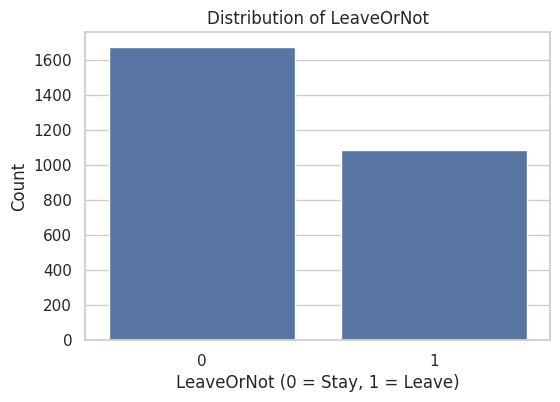

In [16]:
# Plot distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='LeaveOrNot')
plt.title('Distribution of LeaveOrNot')
plt.xlabel('LeaveOrNot (0 = Stay, 1 = Leave)')
plt.ylabel('Count')
plt.show()

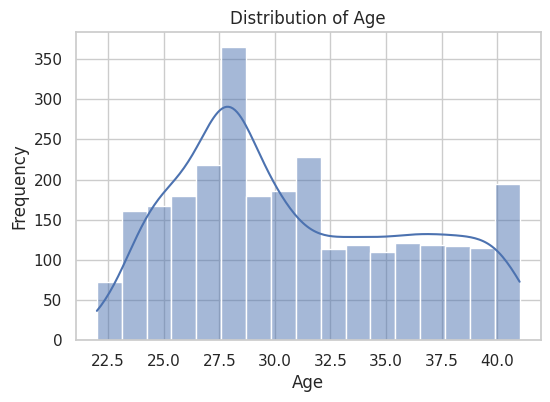

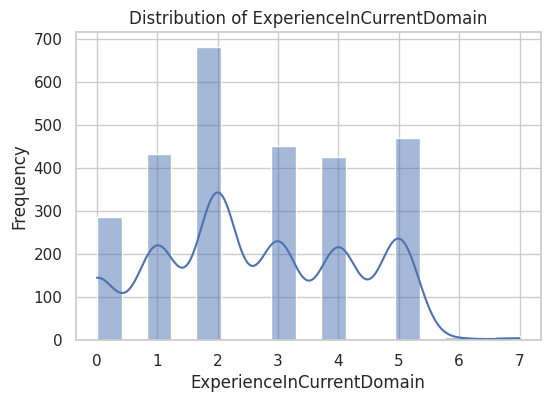

In [17]:
# Plot distributions of numerical features
num_features = ['Age', 'ExperienceInCurrentDomain']
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

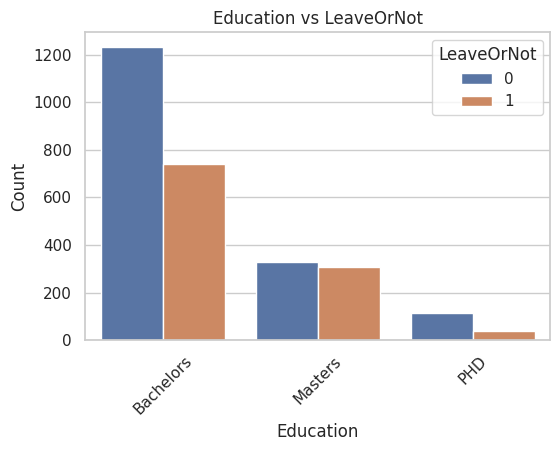

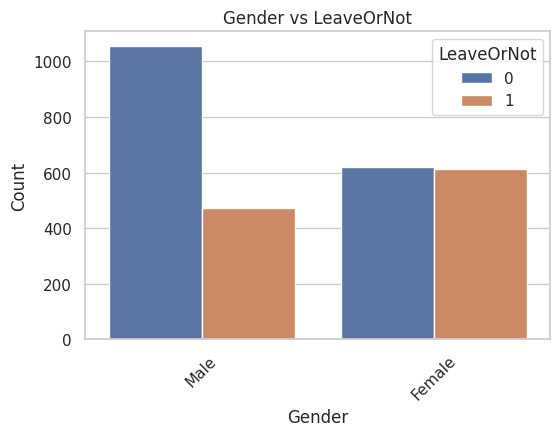

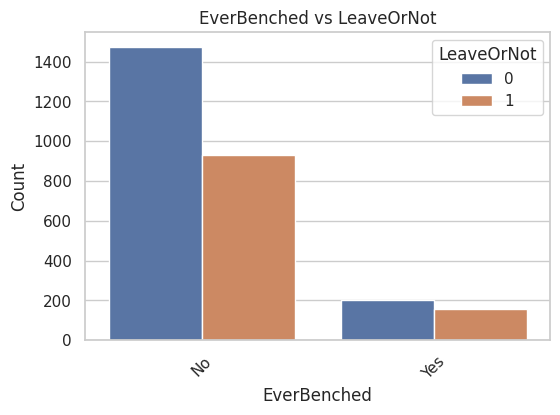

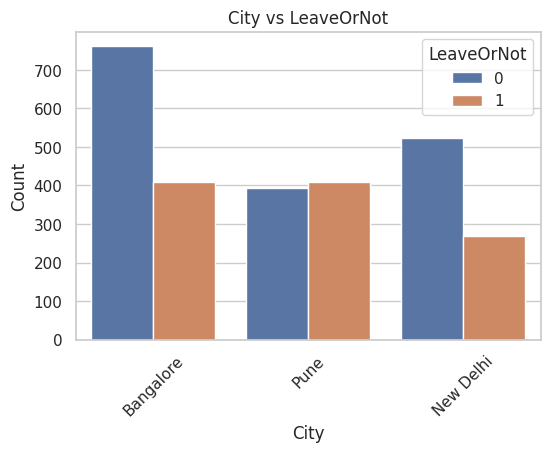

In [18]:
# Count plots for categorical features
cat_features = ['Education', 'Gender', 'EverBenched', 'City']
for feature in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='LeaveOrNot')
    plt.title(f'{feature} vs LeaveOrNot')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='LeaveOrNot')
    plt.xticks(rotation=45)
    plt.show()

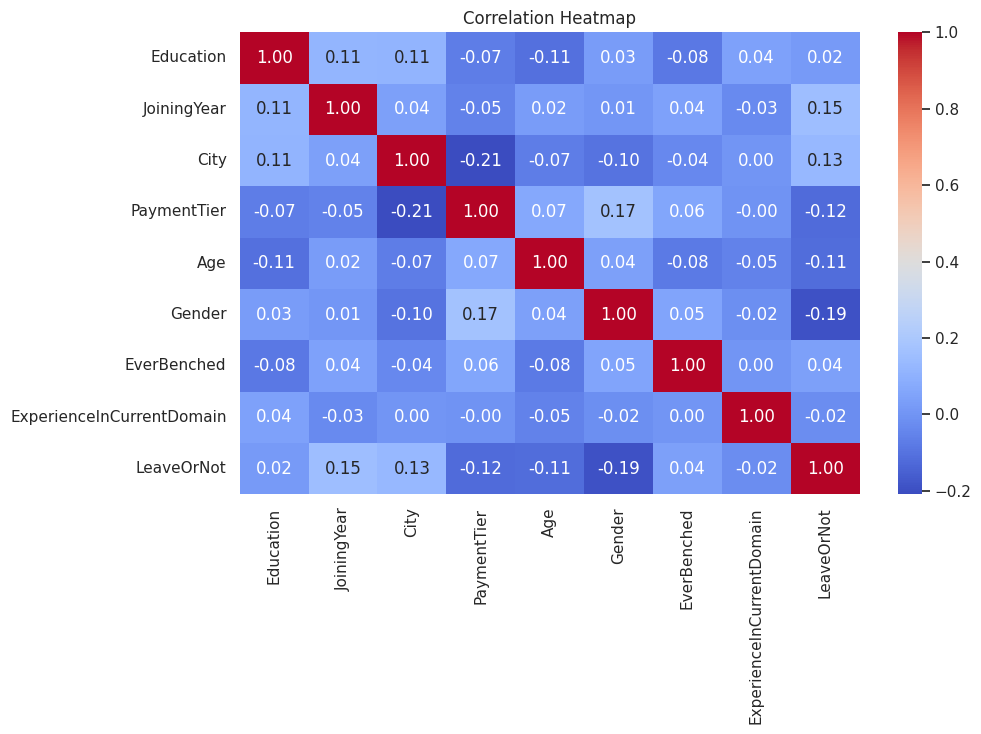

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

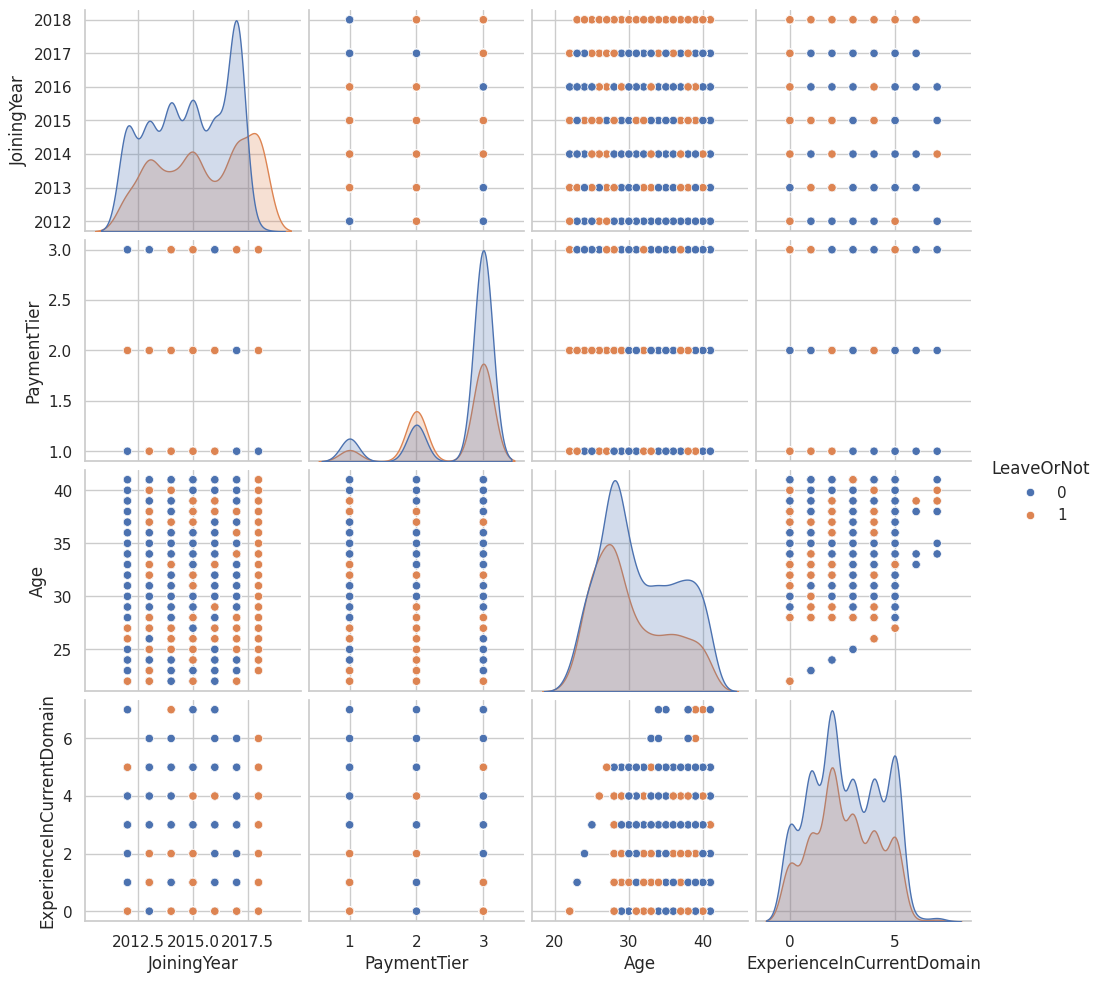

In [20]:
sns.pairplot(df, hue='LeaveOrNot')

<Axes: xlabel='LeaveOrNot', ylabel='Age'>

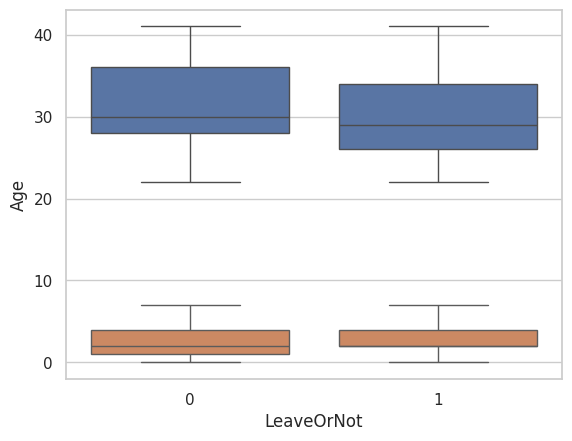

In [21]:
sns.boxplot(x='LeaveOrNot', y='Age', data=df)
sns.boxplot(x='LeaveOrNot', y='ExperienceInCurrentDomain', data=df)

In [22]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Models and hyperparameters
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {"C": [0.01, 0.1, 1, 10], "solver": ["liblinear", "lbfgs"]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {"n_estimators": [100, 200], "max_depth": [None, 10, 20], "min_samples_split": [2, 5]}
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {"n_estimators": [100, 200], "max_depth": [3, 6], "learning_rate": [0.01, 0.1]}
    }
}


In [24]:
# Train and evaluate
best_models = {}
for name, mp in models.items():
    print(f"\n🔍 GridSearchCV for: {name}")
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test_scaled)
    print("Best Params:", grid.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, grid.predict_proba(X_test_scaled)[:, 1]))


🔍 GridSearchCV for: Logistic Regression
Best Params: {'C': 0.01, 'solver': 'lbfgs'}
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.88      0.77       333
           1       0.67      0.37      0.48       220

    accuracy                           0.68       553
   macro avg       0.67      0.62      0.62       553
weighted avg       0.67      0.68      0.65       553

Confusion Matrix:
 [[293  40]
 [139  81]]
ROC AUC Score: 0.6860701610701609

🔍 GridSearchCV for: Random Forest
Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85       333
           1       0.86      0.60      0.71       220

    accuracy                           0.80       553
   macro avg       0.82      0.77      0.78       553
weighted avg       0.81      0.80      0.79       553

Confusion Matrix:
 [[311  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:05:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


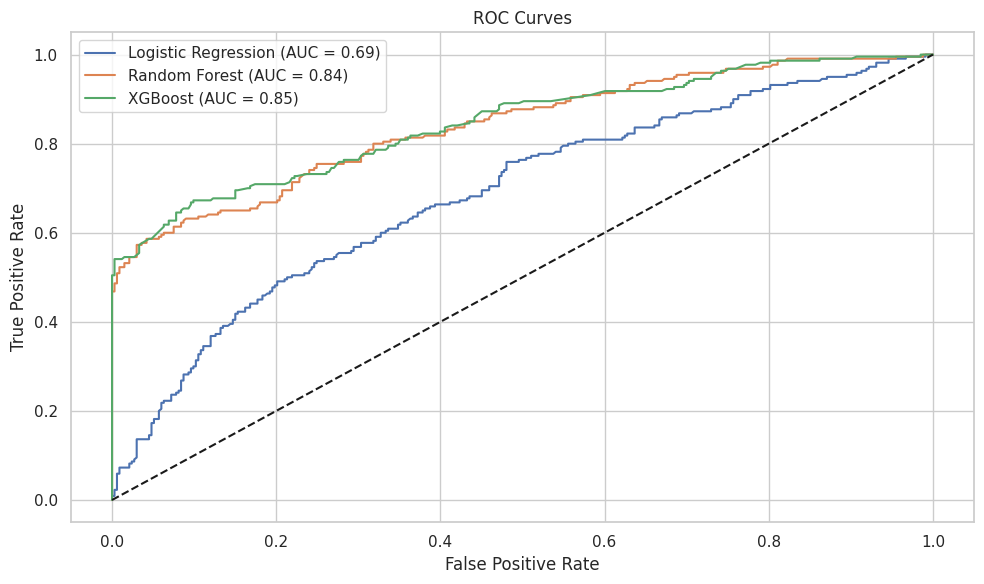

In [25]:
# ROC Curve
plt.figure(figsize=(10, 6))
for name, model in best_models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# Store model performance results
results = []

for name, mp in models.items():
    print(f"\n🔍 GridSearchCV for: {name}")
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)

    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test_scaled)
    y_proba = grid.predict_proba(X_test_scaled)[:, 1]

    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-score": report["1"]["f1-score"],
        "ROC AUC": roc_auc_score(y_test, y_proba),
        "Best Params": grid.best_params_
    })


🔍 GridSearchCV for: Logistic Regression

🔍 GridSearchCV for: Random Forest

🔍 GridSearchCV for: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:05:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [29]:
# Logistic Regression
lr_params = {'C': [0.01, 0.1, 1, 10]}
lr = LogisticRegression(max_iter=1000)
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10]}, scoring='accuracy')

In [30]:
# Random Forest
rf_params = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [31]:
# XGBoost
xgb_params = {'n_estimators': [100, 200], 'max_depth': [3, 6], 'learning_rate': [0.01, 0.1]}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:12:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:12:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:12:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:12:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:12:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [32]:
# Best estimators
models = {
    'Logistic Regression': lr_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_,
    'XGBoost': xgb_grid.best_estimator_
}

In [33]:
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })

In [34]:
# Convert to DataFrame for display
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.634720   0.602273  0.240909  0.344156  0.629109
1        Random Forest  0.797468   0.855263  0.590909  0.698925  0.837217
2              XGBoost  0.808318   0.843373  0.636364  0.725389  0.845461


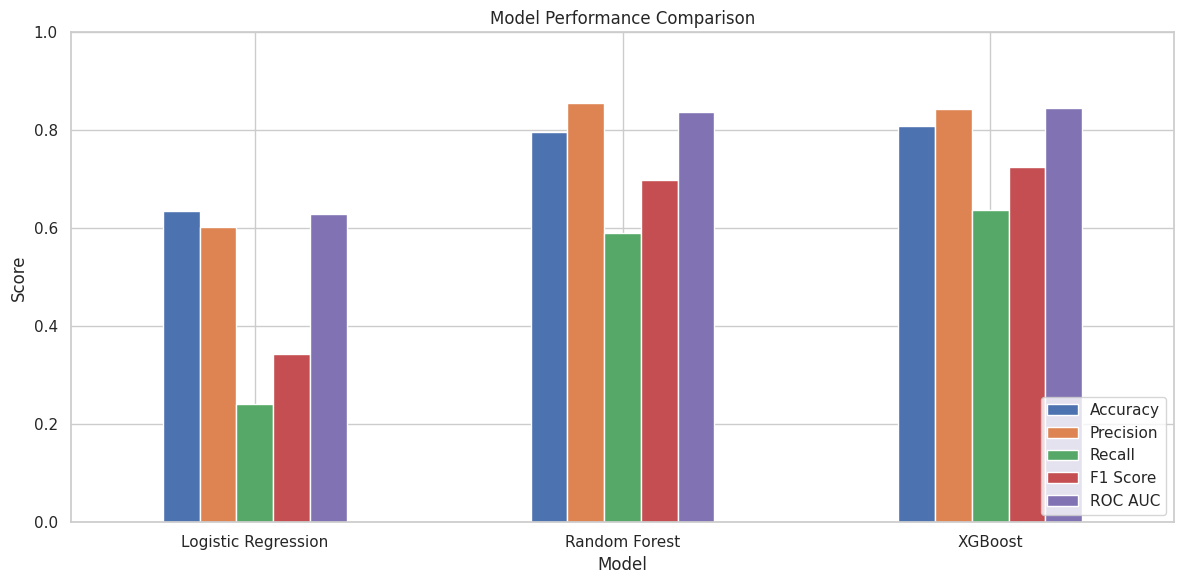

In [35]:
# Set plotting style
results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()